**Data California House**

[Sumber Dataset Data California House](https://www.kaggle.com/datasets/camnugent/california-housing-prices)

**CONTENTS**
1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

### Business Problem Understanding


**Context**
Ini adalah kumpulan data yang digunakan dalam bab kedua dari buku terbaru Aurélien Géron dengan judul 'Hands-On Machine learning with Scikit-Learn and TensorFlow'

Dataset ini berisi informasi dari sensus California 1990. Isi data berkaitan dengan rumah-rumah yang ditemukan di distrik California tertentu dan beberapa ringkasan statistik tentang mereka berdasarkan data sensus 1990. Kolom-kolomnya adalah sebagai berikut:
- longitude
- latitude
- housing_median_age
- total_rooms
- total_bedrooms
- population
- households
- median_income
- median_house_value
- ocean_proximity

**Problem Statement**
Apakah dataset ini bisa digunakan untuk membuat suatu model yang dapat memberikan manfaat bagi suatu perusahaan property dan apakah model nya dapat memberikan keuntungan bagi perusahaan tersebut. 

**Goals**
Berdasarkan pada permasalahan yang ada, perusahaan property memerlukan sebuah model *machine learning* yang dapat membantu mereka memprediksi rumah yang ada di california melalui data sensus 1990

**Analytic Approach**
Data yang ada perlu dianalisis untuk dapat menemukan pola dari fitur-fitur yang ada pada masing-masing property. selanjutnya adalah membuat model regresi yang akan membantu perusahaan untuk menyediakan model prediksi harga

**Metric Evaluation**
Evaluasi metrik yang akan digunakan adalah RMSE dan MAE, di mana RMSE adalah nilai rataan akar kuadrat dari error, MAE adalah rataan nilai absolut dari error. Semakin kecil nilai RMSE dan MAE yang dihasilkan, berarti model semakin akurat dalam memprediksi harga sesuai dengan limitasi fitur yang digunakan.

### Data Understanding

In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns                        
import matplotlib.image as mpimg
%matplotlib inline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression           
from sklearn.model_selection import train_test_split        
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OrdinalEncoder,MinMaxScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from math import sqrt

import warnings
warnings.filterwarnings("ignore")

In [229]:
df = pd.read_csv('data_california_house.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
...,...,...,...,...,...,...,...,...,...,...
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14445,-121.90,36.58,31.0,1431.0,NaN,704.0,393.0,3.1977,NEAR OCEAN,289300.0
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0


In [230]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

Dataset hanya memiliki 10 kolom

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


### Data Preprocessing

Pada tahap ini, data akan dibersihkan untuk digunakan untuk proses analisis selanjutnya 

Missing Value

In [232]:
# cek Missing Value
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        137
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [233]:
df.isna().sum()/df.shape[0]*100

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        0.948228
population            0.000000
households            0.000000
median_income         0.000000
ocean_proximity       0.000000
median_house_value    0.000000
dtype: float64

Terdapat data kosong pada dataset ini yaitu pada kolom *total_bedrooms* dengan persentase data kosong sebesar 0.94%

untuk mempertahankan isi dari dataset, maka untuk menangani data kosong ini saya akan mengisi data kosong ini dengan menggunakan median

In [234]:
total_bedrooms_median = df['total_bedrooms'].median()
total_bedrooms_median

435.0

In [235]:
df['total_bedrooms'].fillna(total_bedrooms_median, inplace = True)

In [236]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

Data Duplicate

In [237]:
# cek data duplicate
df.duplicated().sum()

0

In [238]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,-119.566647,35.630093,28.618702,2640.132683,537.281561,1425.157323,499.508929,3.866667,206824.624516
std,2.006587,2.140121,12.596694,2191.612441,421.683154,1149.580157,383.098390,1.891158,115365.476182
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1451.000000,296.000000,784.000000,279.000000,2.570600,119600.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1165.000000,410.000000,3.539100,180000.000000
75%,-118.000000,37.710000,37.000000,3148.000000,645.000000,1724.000000,604.000000,4.736100,263900.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Selain kolom *longitude* dan *latitude* tidak ada nilai yang <0 sehingga data-data ini dinilai masuk akal

Text(0.5, 1.0, 'Correlation Matrix')

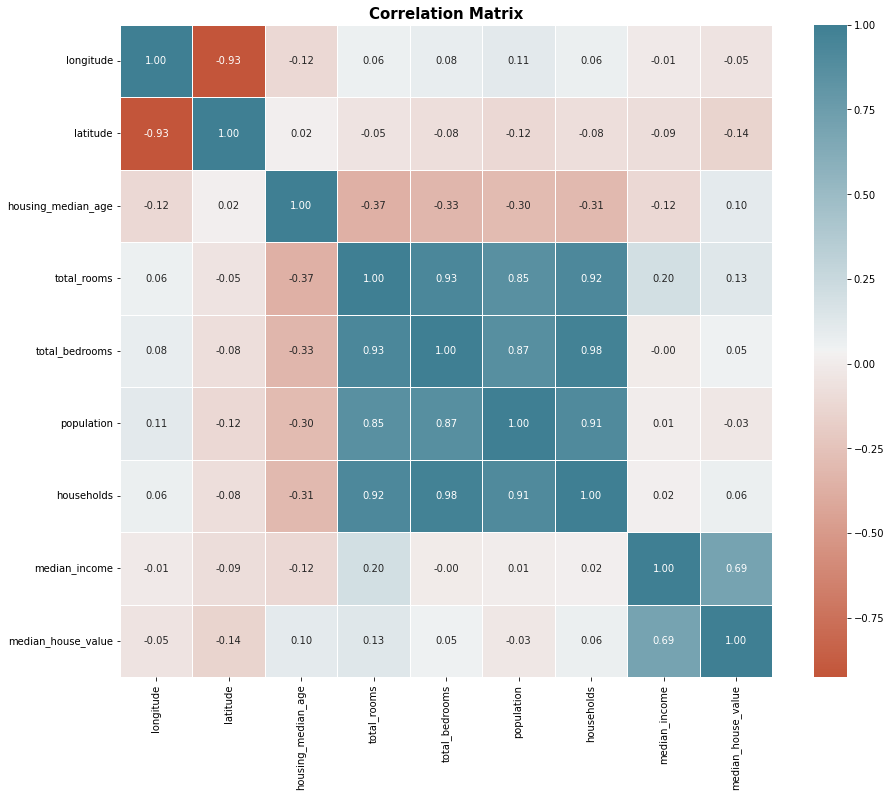

In [239]:
# Correlation matrix
plt.figure(figsize=(15, 12))
palette=sns.diverging_palette(20, 220, n=256)
corr = df.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold')

Pada Correlation matrix ini menunjukkan longitude dan latitude memiliki korelasi negatif yang kuat,  fitur Households memiliki korelasi positif yang kuat terhadap fitur total_rooms dengan total_bedrooms dan ada juga fitur median_house_value yang memiliki korelasi positif yang cukup kuat dengan fitur median_income. Fitur median_house_value yang akan jadi fitur penting pada model yang akan dibuat

Cek Data Outlier

Cek data outlier pada setial kolom numerikal

<AxesSubplot:xlabel='longitude'>

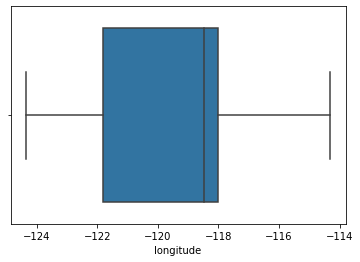

In [240]:
sns.boxplot(df['longitude'])

<AxesSubplot:xlabel='latitude'>

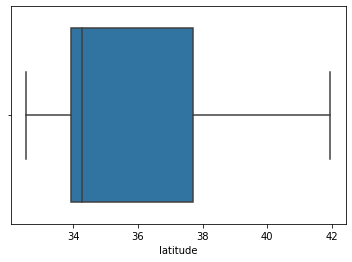

In [241]:
sns.boxplot(df['latitude'])

<AxesSubplot:xlabel='housing_median_age'>

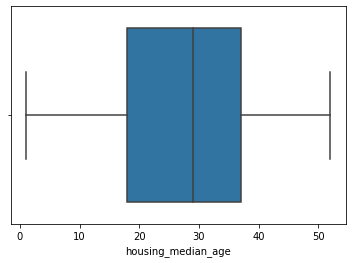

In [242]:
sns.boxplot(df['housing_median_age'])

<AxesSubplot:xlabel='total_rooms'>

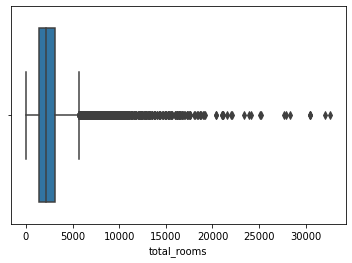

In [243]:
sns.boxplot(df['total_rooms'])

<AxesSubplot:xlabel='total_bedrooms'>

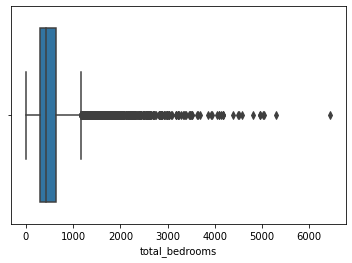

In [244]:
sns.boxplot(df['total_bedrooms'])

<AxesSubplot:xlabel='population'>

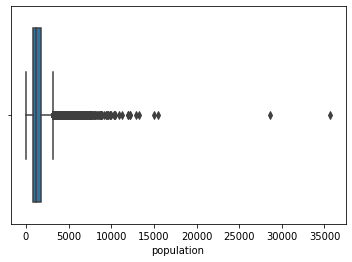

In [245]:
sns.boxplot(df['population'])

<AxesSubplot:xlabel='households'>

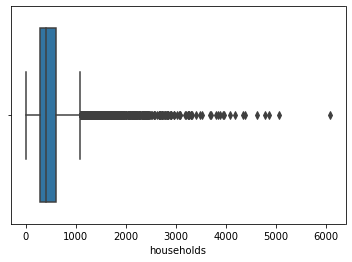

In [246]:
sns.boxplot(df['households'])

<AxesSubplot:xlabel='median_income'>

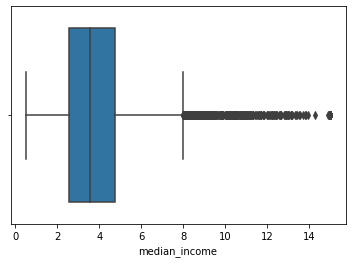

In [247]:
sns.boxplot(df['median_income'])

<AxesSubplot:xlabel='median_house_value'>

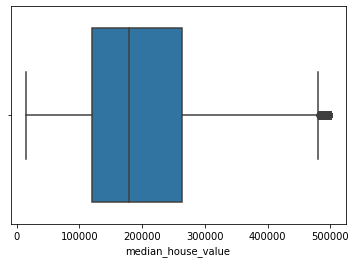

In [248]:
sns.boxplot(df['median_house_value'])

Mengatasi data Outlier

In [249]:
# mengatasi data outliers kolom total_rooms

q1 = (df['total_rooms']).quantile(0.25)
q3 = (df['total_rooms']).quantile(0.75)
IQR = q3 -q1
maximum = q3 + (1.5*IQR)
print('Nilai Maximum dari kolom total_rooms: ',maximum)
minimum = q1 - (1.5*IQR)
print('Nilai Minimum dari kolom total_rooms: ',minimum)
print('IQR:', IQR)
more_than = (df['total_rooms'] > maximum)
lower_than = (df['total_rooms'] < minimum)
df['total_rooms'] = df['total_rooms'].mask(more_than, maximum, axis = None)
df['total_rooms'] = df['total_rooms'].mask(lower_than, minimum, axis = None)

print('\npersebaran data setelah ditangani outliers')
print(df['total_rooms'].describe())

Nilai Maximum dari kolom total_rooms:  5693.5
Nilai Minimum dari kolom total_rooms:  -1094.5
IQR: 1697.0

persebaran data setelah ditangani outliers
count    14448.000000
mean      2440.619532
std       1397.886184
min          2.000000
25%       1451.000000
50%       2125.000000
75%       3148.000000
max       5693.500000
Name: total_rooms, dtype: float64


In [250]:
# mengatasi data Outlier pada kolom total_bedrooms
q1 = (df['total_bedrooms']).quantile(0.25)
q3 = (df['total_bedrooms']).quantile(0.75)
IQR = q3 -q1
maximum = q3 + (1.5*IQR)
print('Nilai Maximum dari kolom total_bedrooms: ',maximum)
minimum = q1 - (1.5*IQR)
print('Nilai Minimum dari kolom total_bedrooms: ',minimum)
print('IQR:', IQR)
more_than = (df['total_bedrooms'] > maximum)
lower_than = (df['total_bedrooms'] < minimum)
df['total_bedrooms'] = df['total_bedrooms'].mask(more_than, maximum, axis = None)
df['total_bedrooms'] = df['total_bedrooms'].mask(lower_than, minimum, axis = None)

print('\npersebaran data setelah ditangani outliers')
print(df['total_bedrooms'].describe())

Nilai Maximum dari kolom total_bedrooms:  1168.5
Nilai Minimum dari kolom total_bedrooms:  -227.5
IQR: 349.0

persebaran data setelah ditangani outliers
count    14448.000000
mean       500.915352
std        284.653478
min          1.000000
25%        296.000000
50%        435.000000
75%        645.000000
max       1168.500000
Name: total_bedrooms, dtype: float64


In [251]:
# mengatasi data Outlier pada kolom population
q1 = (df['population']).quantile(0.25)
q3 = (df['population']).quantile(0.75)
IQR = q3 -q1
maximum = q3 + (1.5*IQR)
print('Nilai Maximum dari kolom population: ',maximum)
minimum = q1 - (1.5*IQR)
print('Nilai Minimum dari kolom population: ',minimum)
print('IQR:', IQR)
more_than = (df['population'] > maximum)
lower_than = (df['population'] < minimum)
df['population'] = df['population'].mask(more_than, maximum, axis = None)
df['population'] = df['population'].mask(lower_than, minimum, axis = None)

print('\npersebaran data setelah ditangani outliers')
print(df['population'].describe())

Nilai Maximum dari kolom population:  3134.0
Nilai Minimum dari kolom population:  -626.0
IQR: 940.0

persebaran data setelah ditangani outliers
count    14448.000000
mean      1334.497785
std        765.269565
min          3.000000
25%        784.000000
50%       1165.000000
75%       1724.000000
max       3134.000000
Name: population, dtype: float64


In [252]:
# mengatasi data Outlier pada kolom households
q3 = (df['households']).quantile(0.75)
IQR = q3 -q1
maximum = q3 + (1.5*IQR)
print('Nilai Maximum dari kolom households: ',maximum)
minimum = q1 - (1.5*IQR)
print('Nilai Minimum dari kolom households: ',minimum)
print('IQR:', IQR)
more_than = (df['households'] > maximum)
lower_than = (df['households'] < minimum)
df['households'] = df['households'].mask(more_than, maximum, axis = None)
df['households'] = df['households'].mask(lower_than, minimum, axis = None)

print('\npersebaran data setelah ditangani outliers')
print(df['households'].describe())

Nilai Maximum dari kolom households:  334.0
Nilai Minimum dari kolom households:  1054.0
IQR: -180.0

persebaran data setelah ditangani outliers
count    14448.000000
mean      1008.053156
std        175.990792
min        334.000000
25%       1054.000000
50%       1054.000000
75%       1054.000000
max       1054.000000
Name: households, dtype: float64


In [253]:
# mengatasi data Outlier pada kolom median_income
q3 = (df['median_income']).quantile(0.75)
IQR = q3 -q1
maximum = q3 + (1.5*IQR)
print('Nilai Maximum dari kolom median_income: ',maximum)
minimum = q1 - (1.5*IQR)
print('Nilai Minimum dari kolom median_income: ',minimum)
print('IQR:', IQR)
more_than = (df['median_income'] > maximum)
lower_than = (df['median_income'] < minimum)
df['median_income'] = df['median_income'].mask(more_than, maximum, axis = None)
df['median_income'] = df['median_income'].mask(lower_than, minimum, axis = None)

print('\npersebaran data setelah ditangani outliers')
print(df['median_income'].describe())

Nilai Maximum dari kolom median_income:  -1164.15975
Nilai Minimum dari kolom median_income:  1952.89585
IQR: -779.2639

persebaran data setelah ditangani outliers
count    1.444800e+04
mean     1.952896e+03
std      4.547631e-13
min      1.952896e+03
25%      1.952896e+03
50%      1.952896e+03
75%      1.952896e+03
max      1.952896e+03
Name: median_income, dtype: float64


In [254]:
# mengatasi data Outlier pada kolom median_house_value
q3 = (df['median_house_value']).quantile(0.75)
IQR = q3 -q1
maximum = q3 + (1.5*IQR)
print('Nilai Maximum dari kolom median_house_value: ',maximum)
minimum = q1 - (1.5*IQR)
print('Nilai Minimum dari kolom median_house_value: ',minimum)
print('IQR:', IQR)
more_than = (df['median_house_value'] > maximum)
lower_than = (df['median_house_value'] < minimum)
df['median_house_value'] = df['median_house_value'].mask(more_than, maximum, axis = None)
df['median_house_value'] = df['median_house_value'].mask(lower_than, minimum, axis = None)

print('\npersebaran data setelah ditangani outliers')
print(df['median_house_value'].describe())

Nilai Maximum dari kolom median_house_value:  658574.0
Nilai Minimum dari kolom median_house_value:  -393890.0
IQR: 263116.0

persebaran data setelah ditangani outliers
count     14448.000000
mean     206824.624516
std      115365.476182
min       14999.000000
25%      119600.000000
50%      180000.000000
75%      263900.000000
max      500001.000000
Name: median_house_value, dtype: float64


In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14448 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


In [256]:
# Mengubah data Kategorikal menjadi Numerikal
house_ocean_prox = pd.get_dummies(df['ocean_proximity'])
house_ocean_prox.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,1,0,0,0
1,0,0,0,1,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


implementasi lebih mudah menggunakan pd.get_dummies

In [257]:
df = pd.concat([df,house_ocean_prox], axis = 1)
df.drop('ocean_proximity',axis = 1, inplace =True)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-119.79,36.73,52.0,112.0,28.0,193.0,1054.0,1952.89585,47500.0,0,1,0,0,0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,1054.0,1952.89585,100000.0,0,0,0,1,0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,1054.0,1952.89585,285800.0,1,0,0,0,0
3,-118.28,34.06,17.0,2518.0,1168.5,3051.0,1054.0,1952.89585,175000.0,1,0,0,0,0
4,-119.81,36.73,50.0,772.0,194.0,606.0,1054.0,1952.89585,59200.0,0,1,0,0,0


Dataset setelah dilakukan preprocessing

In [258]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-119.79,36.73,52.0,112.0,28.0,193.0,1054.0,1952.89585,47500.0,0,1,0,0,0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,1054.0,1952.89585,100000.0,0,0,0,1,0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,1054.0,1952.89585,285800.0,1,0,0,0,0
3,-118.28,34.06,17.0,2518.0,1168.5,3051.0,1054.0,1952.89585,175000.0,1,0,0,0,0
4,-119.81,36.73,50.0,772.0,194.0,606.0,1054.0,1952.89585,59200.0,0,1,0,0,0


### Modeling

In [259]:
# split dataset
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

Feature Scalling
- Feature Scaling adalah suatu cara untuk membuat numerical data pada dataset memiliki rentang nilai (scale) yang sama. Tidak ada lagi satu variabel data yang mendominasi variabel data lainnya.
disini saya menggunakan MinMaxScaller

In [260]:
# Feature Scalling
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X[0:5]

array([[0.45418327, 0.44527099, 1.        , 0.01932707, 0.02312634,
        0.06068349, 1.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        ],
       [0.21314741, 0.55579171, 0.82352941, 0.17833612, 0.28008565,
        0.26604919, 1.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        ],
       [0.62848606, 0.141339  , 0.31372549, 0.41395063, 0.33832976,
        0.4420313 , 1.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.60458167, 0.16153029, 0.31372549, 0.44206273, 1.        ,
        0.9734909 , 1.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.45219124, 0.44527099, 0.96078431, 0.13528947, 0.16531049,
        0.19259023, 1.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        ]])

In [262]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size = 0.2,
                                                   random_state = 42)

In [263]:
print(f"""
Shape of X Train: {X_train.shape}
Shape of Y Train: {y_train.shape}
Shape of X Test:  {X_test.shape}
Shape of Y Test:  {y_test.shape}
""")


Shape of X Train: (11558, 13)
Shape of Y Train: (11558,)
Shape of X Test:  (2890, 13)
Shape of Y Test:  (2890,)



In [264]:
def score_display(scores):
    scores = np.sqrt(-scores)
    print(f"""
    RMSE Scores : {scores}
    Mean : {scores.mean()}
    Standart Deviation : {scores.std()}
    """)

Model yang akan dibandingkan

In [265]:
linreg = LinearRegression()
DecTree = DecisionTreeRegressor()
RandForest = RandomForestRegressor()
KNReg = KNeighborsRegressor()


In [266]:
linreg_scores = cross_val_score(linreg,
                               X_train,y_train,
                               scoring = 'neg_mean_squared_error',
                               cv=10)

In [267]:
score_display(linreg_scores)


    RMSE Scores : [85451.00660839 87661.2261574  88315.30064667 85897.8919903
 82256.12915852 87789.53872478 81291.77048554 87590.69294972
 87016.12866494 83784.74158387]
    Mean : 85705.44269701406
    Standart Deviation : 2354.168715979236
    


In [268]:
DecTree_scores = cross_val_score(DecTree,
                               X_train,y_train,
                               scoring = 'neg_mean_squared_error',
                               cv=10)

In [269]:
score_display(DecTree_scores)


    RMSE Scores : [77865.90328916 73158.28934728 75849.22098882 82227.81456385
 76569.32006218 83095.89196714 75856.80418878 80576.82607014
 73000.32489549 76549.17863134]
    Mean : 77474.95740041722
    Standart Deviation : 3309.8886340870813
    


In [270]:
RandForest_scores = cross_val_score(RandForest,
                               X_train,y_train,
                               scoring = 'neg_mean_squared_error',
                               cv=10)

In [272]:
score_display(RandForest_scores)


    RMSE Scores : [55485.17524562 51355.04652259 54389.79614018 56563.05226717
 50365.62097606 56289.44845036 55374.1982364  53560.43858762
 54886.22797103 54346.15800449]
    Mean : 54261.51624015202
    Standart Deviation : 1915.0963534440928
    


In [273]:
KNReg_scores = cross_val_score(KNReg,
                               X_train,y_train,
                               scoring = 'neg_mean_squared_error',
                               cv=10)

In [274]:
score_display(KNReg_scores)


    RMSE Scores : [73862.14369707 74113.50835086 73764.62861012 75679.58836712
 72479.67762058 75899.17576427 70870.07403431 74295.17448826
 73175.11490675 74664.27244084]
    Mean : 73880.33582801759
    Standart Deviation : 1403.161312267302
    


RandomForestRegressor memiliki nilai RMSE paling rendah (55603.50770133) dan Mean (54411.22698704475), jadi saya memutuskan untuk menggunakan RandomForestRegressor sebagai model akhir

setelah menentukan algoritma yang akan digunakan sebagai model, sekarang saatnya untuk melakukan tuning parameter pada model tersebut

In [276]:
# Parameter Tuning menggunakan GridSearchCV

params = {'n_estimators': [3, 5, 10, 20, 30, 40, 50, 70, 80, 100], 
          'max_features': [1,2, 3, 4, 5, 6, 7, 8, 10,20]}

In [277]:
grid_s = GridSearchCV(RandForest, params, 
                     cv=5,
                     scoring='neg_mean_squared_error')

In [278]:
grid_s.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 10, 20],
                         'n_estimators': [3, 5, 10, 20, 30, 40, 50, 70, 80,
                                          100]},
             scoring='neg_mean_squared_error')

In [279]:
grid_s.best_params_

{'max_features': 10, 'n_estimators': 100}

In [280]:
for mean_score,params in zip((grid_s.cv_results_['mean_test_score']),
                             (grid_s.cv_results_['params'])):
    print(np.sqrt(-mean_score),'    ',params)

75184.62049444111      {'max_features': 1, 'n_estimators': 3}
70339.95650031272      {'max_features': 1, 'n_estimators': 5}
65135.8180820788      {'max_features': 1, 'n_estimators': 10}
63501.456435212145      {'max_features': 1, 'n_estimators': 20}
62764.903899140074      {'max_features': 1, 'n_estimators': 30}
62130.32204278347      {'max_features': 1, 'n_estimators': 40}
61602.02601258557      {'max_features': 1, 'n_estimators': 50}
61495.88384206095      {'max_features': 1, 'n_estimators': 70}
61414.563279077796      {'max_features': 1, 'n_estimators': 80}
61209.382019456796      {'max_features': 1, 'n_estimators': 100}
72812.95304828933      {'max_features': 2, 'n_estimators': 3}
68587.12068531645      {'max_features': 2, 'n_estimators': 5}
64248.95489425172      {'max_features': 2, 'n_estimators': 10}
61911.082585685275      {'max_features': 2, 'n_estimators': 20}
61067.734381868606      {'max_features': 2, 'n_estimators': 30}
60563.88123992061      {'max_features': 2, 'n_estimat

Dapat dilihat hasil dari seluruh mean_test_score dengan menggunakan semua parameter yang ditentukan untuk melihat dengan rinci hasil dari semua parameter dan parameter terbaik adalah 'max_features': 10, 'n_estimators': 100

hasil ini juga menunjukkan dengan melalukan parameter tuning, nilai mean yang dihasilkan menjadi sedikit lebih baik dari (54411.22698704475) menjadi (53955.13857298006)

In [281]:
predictions = grid_s.best_estimator_.predict(X_test)

In [282]:
y_test[0:10].values

array([115400., 166100., 202900., 138000., 231800., 127900., 139300.,
       197100., 148000., 163300.])

In [283]:
comparison = pd.DataFrame({'Y Test': y_test[0:10].values,
                          'Predictions' : predictions[0:10]})
comparison

,Y Test,Predictions
0,115400.0,114310.00
1,166100.0,153872.01
2,202900.0,196528.00
3,138000.0,146421.00
4,231800.0,213207.00
5,127900.0,124184.00
6,139300.0,115811.00
7,197100.0,224735.00
8,148000.0,164789.01
9,163300.0,156336.00


Selisih paling sedikit: 115400 - 115251 = 1090 (0.94%)

selisih paling banyak: 231800 - 213207 = 27635 (11.92%)

In [290]:
def regression_evaluation(preds):
    mse = mean_squared_error(y_test,preds)
    rmse = np.sqrt(mse)
    r_squared = r2_score(y_test,preds)
    mae = mean_absolute_error(y_test,preds)
    
    print(f"Mean Absolute Error: {mae} \nMean Squared Error:{mse} \nRoot Mean Squared Error:{rmse} \nR Squared Value:{r_squared}")

In [291]:
regression_evaluation(predictions)

Mean Absolute Error: 34660.74764705882 
Mean Squared Error:2660181624.0688815 
Root Mean Squared Error:51576.94857268004 
R Squared Value:0.8007509182646917


Terdapat perbedaan antara nilai RMSE dan MAE, nilai RMSE lebih tinggi dari nilai MAE karena nilai error nya dikuadratkan terlebih dahulu sebelum di rata-ratakan. Hal ini menyebabkan RMSE akan memberikan 'weight' yang lebih tinggi untuk nilai error yang besar.

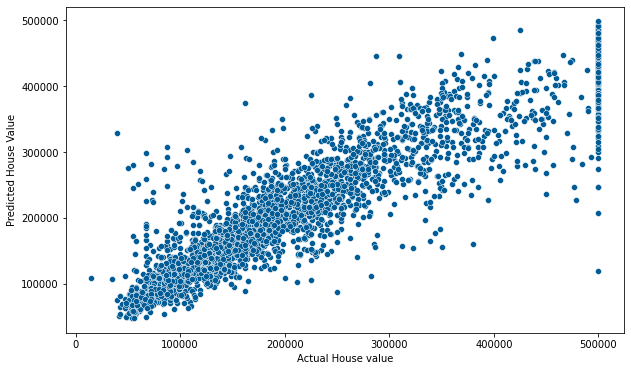

In [286]:
plt.figure(figsize= (10, 6))
sns.scatterplot(x= y_test, y=predictions, color= '#005b96')
plt.xlabel('Actual House value')
plt.ylabel('Predicted House Value')
plt.show()

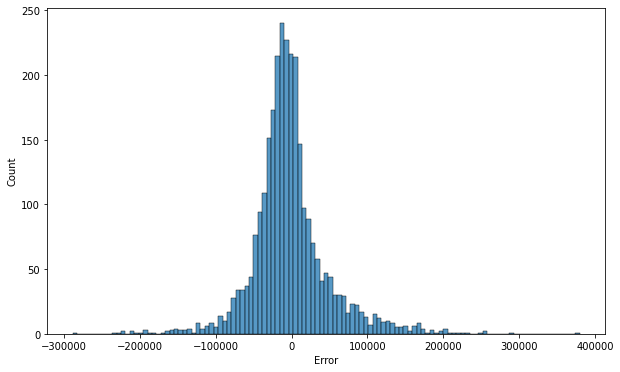

In [287]:
resid = y_test - predictions
plt.figure(figsize= (10, 6))
sns.histplot(resid)
plt.xlabel('Error');

Distribusi error terlihat baik, jumlah error tinggi tidak banyak

In [289]:
# Save model
import pickle


pickle.dump(RandForest, open('Model_California_house.sav', 'wb'))

### Conclusion

- Berdasarkan pemodelan yang telah dilakukan. fitur median_house_value menjadi fitur yang paling penting dan median_income menjadi fitur yang memiliki koreladi positif paling kuat terhadap fitur median_house_value dibandingkan dengan fitur lainnya. 

- Metric evaluasion yang digunakan pada model ini adalah nilai RMSE dan MAE dengan nilai RMSE terbaik yang didapatkan adalah 51576.94857268004 dan nilai MAE terbaik yang didapatkan adalah 34660.74764705882 

- Hasil perbandingan harga antara "Y test" dengan "Prediction" menunjukkan bahwa:

    Selisih paling sedikit: 115400 - 115251 = 1090 (0.94%)

    selisih paling banyak: 231800 - 213207 = 27635 (11.92%)
    salah satu prediksi yang dihasilkan oleh model ini bisa melenceng dari harga sebenernya dengan persentase 11.92%

### Recomendation

Untuk mengembangkan model menjadi lebih baik, ada beberapa hal yang bisa dilakukan yaitu:
1. menambahkan banyak data sehingga model bisa mengambil pola dari dataset lebih banyak sehingga bisa menghasilkan model yang lebih baik
2. menambahkan fitur yang lebih berkorelasi dengan fitur *median_house_value*
3. menggunakan RandomizedSearchCV untuk mendapatkan hasil tuning yang berbeda